<a href="https://colab.research.google.com/github/Riyaloya27/NeuroNexus/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Load the dataset
data = pd.read_csv("spam.csv", encoding='latin-1')

In [4]:
# Select relevant columns (text and labels)
data = data[['v2', 'v1']]
data.columns = ['text', 'label']

In [5]:
# Preprocess the text data
data['text'] = data['text'].str.lower()

In [6]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

In [7]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [8]:
# Train a logistic regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

LogisticRegression()

In [9]:
# Predictions
y_pred = classifier.predict(X_test_tfidf)

In [10]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9659192825112107
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       0.99      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



In [11]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [12]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[964   1]
 [ 37 113]]


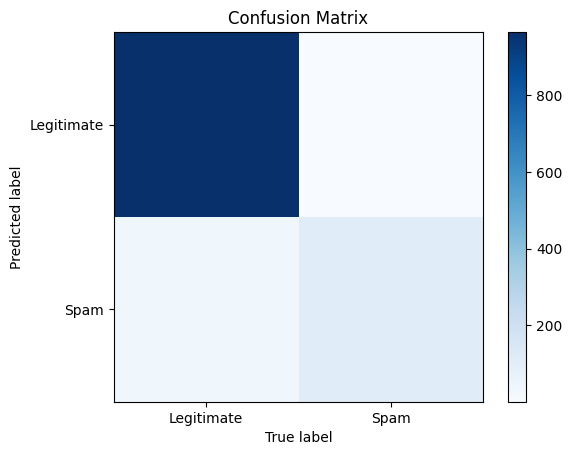

In [13]:
# Plot Confusion Matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.xticks([0, 1], ['Legitimate', 'Spam'])
plt.yticks([0, 1], ['Legitimate', 'Spam'])
plt.show()

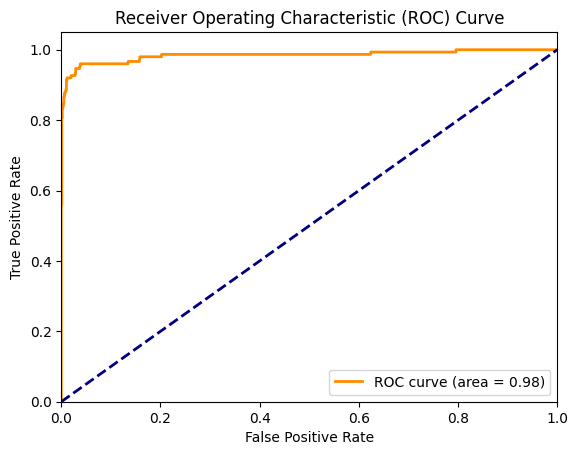

In [14]:
from sklearn.preprocessing import LabelBinarizer

# Convert labels to binary format
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# ROC Curve and AUC Score
y_pred_proba = classifier.predict_proba(X_test_tfidf)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

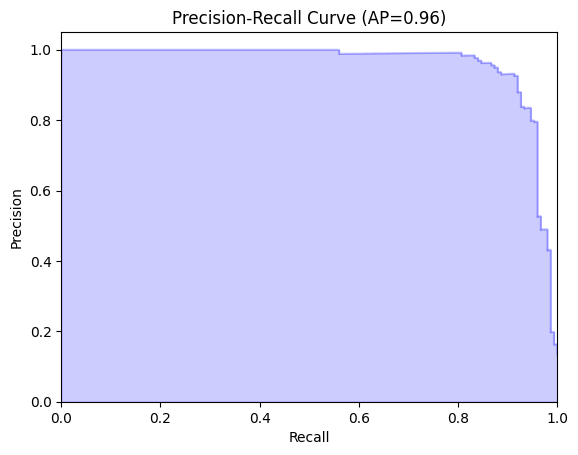

In [15]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test_bin, y_pred_proba)
average_precision = average_precision_score(y_test_bin, y_pred_proba)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve (AP={0:0.2f})'.format(average_precision))
plt.show()


In [17]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# Instantiate classifiers
nb_gaussian = GaussianNB()
nb_multinomial = MultinomialNB()
nb_bernoulli = BernoulliNB()

# Train Gaussian NB
nb_gaussian.fit(X_train_tfidf.toarray(), y_train)

# Train Multinomial NB
nb_multinomial.fit(X_train_tfidf, y_train)

# Train Bernoulli NB
nb_bernoulli.fit(X_train_tfidf > 0, y_train)

# Predictions
y_pred_gaussian = nb_gaussian.predict(X_test_tfidf.toarray())
y_pred_multinomial = nb_multinomial.predict(X_test_tfidf)
y_pred_bernoulli = nb_bernoulli.predict(X_test_tfidf > 0)

# Evaluate Gaussian NB
accuracy_gaussian = accuracy_score(y_test, y_pred_gaussian)
print("Gaussian Naive Bayes Classifier Accuracy:", accuracy_gaussian)
print(classification_report(y_test, y_pred_gaussian))

# Evaluate Multinomial NB
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
print("Multinomial Naive Bayes Classifier Accuracy:", accuracy_multinomial)
print(classification_report(y_test, y_pred_multinomial))

# Evaluate Bernoulli NB
accuracy_bernoulli = accuracy_score(y_test, y_pred_bernoulli)
print("Bernoulli Naive Bayes Classifier Accuracy:", accuracy_bernoulli)
print(classification_report(y_test, y_pred_bernoulli))


Gaussian Naive Bayes Classifier Accuracy: 0.8968609865470852
              precision    recall  f1-score   support

         ham       0.98      0.90      0.94       965
        spam       0.57      0.90      0.70       150

    accuracy                           0.90      1115
   macro avg       0.78      0.90      0.82      1115
weighted avg       0.93      0.90      0.91      1115

Multinomial Naive Bayes Classifier Accuracy: 0.9623318385650225
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Bernoulli Naive Bayes Classifier Accuracy: 0.9748878923766816
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.81      0.90       

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Instantiate SVM classifier
svm_classifier = SVC(kernel='linear')

# Train SVM classifier
svm_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluate SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Classifier Accuracy:", accuracy_svm)
print(classification_report(y_test, y_pred_svm))


Support Vector Machine Classifier Accuracy: 0.9829596412556054
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



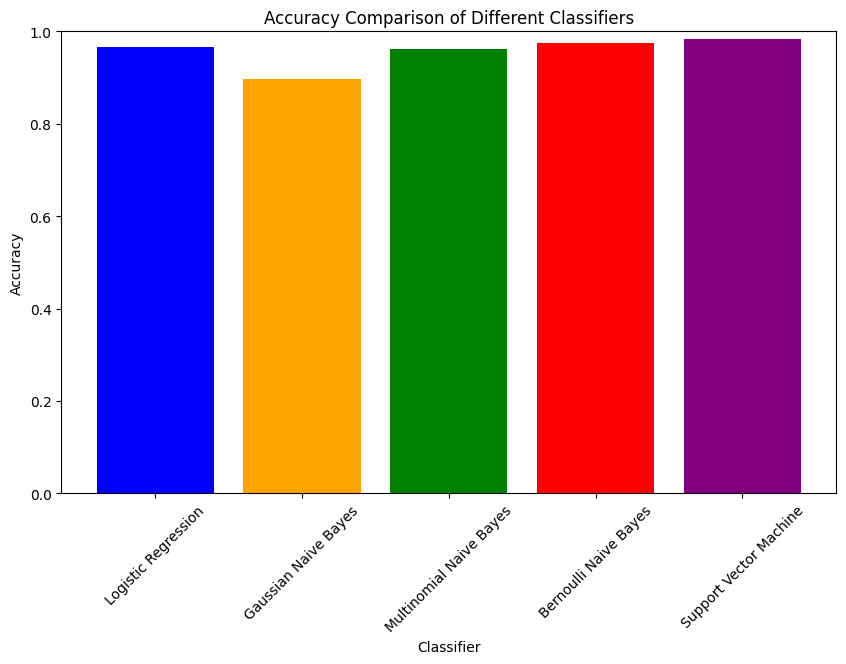

In [22]:
import matplotlib.pyplot as plt

# Accuracy scores for each classifier
accuracies = [accuracy, accuracy_gaussian, accuracy_multinomial, accuracy_bernoulli, accuracy_svm]

# Classifier names
classifiers = ['Logistic Regression', 'Gaussian Naive Bayes', 'Multinomial Naive Bayes', 'Bernoulli Naive Bayes', 'Support Vector Machine']

# Plot the bar graph
plt.figure(figsize=(10,6))
plt.bar(classifiers, accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Classifiers')
plt.ylim(0, 1)  # Limit y-axis to 0-1 for accuracy
plt.xticks(rotation=45)
plt.show()
